In [1]:
"""
Constant-pressure, adiabatic kinetics simulation.

Requires: cantera >= 2.5.0, matplotlib >= 2.0
"""

import sys
import os
import numpy   as np

import matplotlib.pyplot as plt
WORKSPACE_PATH  = os.environ['WORKSPACE_PATH']
plt.style.use(WORKSPACE_PATH+'/ROMNet/romnet/extra/postprocessing/presentation.mplstyle')

import cantera as ct

from scipy.integrate import solve_ivp

In [2]:
##########################################################################################
### Input Data

OutputDir          = WORKSPACE_PATH + '/ROMNet/Data_100DReact/'
FigDir             = OutputDir + '/fig/'

MixtureFile        = 'gri30.yaml'
NTs                = 10
T0Vec              = np.logspace(np.log10(300), np.log10(3000), NTs) # [2.e-5]
NPerT0             = 3000

tStratch           = 1.
Nt                 = NPerT0*2

P0Inlet            = ct.one_atm
EqRatioInlet       = 1.
##########################################################################################

In [3]:
def ReactorOde_CVODE(t, y):
    print(t)

    YEnd     = np.array([1.-np.sum(y[1:])], dtype=np.float64)
    Y        = np.concatenate((y[1:], YEnd), axis=0)
    gas_.TPY = y[0], P_, Y
    
    wdot     = gas_.net_production_rates

    ydot     = np.zeros_like(y, dtype=np.float64)
    ydot[0]  = - np.dot(wdot, gas_.partial_molar_enthalpies) / gas_.cp / gas_.density
    ydot[1:] = wdot[0:-1] * gas_.molecular_weights[0:-1] / gas_.density
    
    return ydot

In [4]:
T0 = T0Vec[0]

In [5]:
gas      = ct.Solution('gri30.yaml')
fuel     = "CH4"
oxidizer = "O2:0.21,N2:0.77,H:0.02"

gas.TP  = 1000., ct.one_atm
gas.set_equivalence_ratio(1., fuel, oxidizer)

r       = ct.IdealGasConstPressureReactor(gas)
gas_    = gas
mass_   = r.mass
P_      = ct.one_atm

y0      = np.array(np.hstack((gas_.T, gas_.Y[0:-1])), dtype=np.float64)

In [6]:
gas_.Y[0:-1]

array([0.00000000e+00, 6.73011143e-04, 0.00000000e+00, 2.24323027e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.48960601e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.20107902e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [7]:
ct.one_atm

101325.0

In [8]:
dt0        = 1.e-10
tMax       = 1.e-2
tout       = [0.]
tout       = np.concatenate((np.array(tout), np.logspace(np.log10(dt0), np.log10(tMax), Nt-1)), axis=0)
rtol       = 1.e-8

states     = ct.SolutionArray(gas, 1, extra={'t': [0.0]})
SOLVER     = 'BDF'#'RK23'#'BDF'#'Radau'

In [10]:
### Integrate
NTott    = len(output.t)
#JJTauMat = np.zeros((NTott, output.y.shape[0]))
for it in range(NTott):
    t = output.t[it]
    u = output.y[:,it]

    Y        = np.concatenate((u[1:], [1.-np.sum(u[1:])]), axis=0)
    gas_.TPY = u[0], P_, Y

    if (t==0.):
        Mat    = np.concatenate((y0[np.newaxis,...], [[1.-np.sum(u[1:])]]), axis=1)

    else:
        Mat    = np.concatenate((Mat, np.concatenate((u[np.newaxis,...], [[1.-np.sum(u[1:])]]), axis=1) ), axis=0)
        states.append(gas_.state, t=t)

    #JJEig          = np.linalg.eigvals(JJ)
    #JJTauMat[it,:] = 1./np.abs(JJEig)

r.

In [11]:
y0[np.newaxis,...]

array([[1.00000000e+03, 0.00000000e+00, 6.73011143e-04, 0.00000000e+00,
        2.24323027e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 5.48960601e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.20107902e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]])

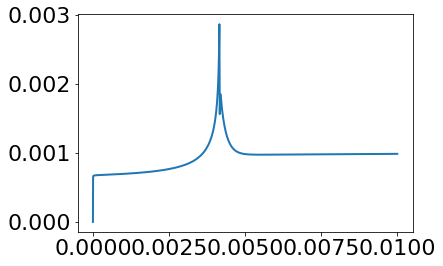

In [12]:
plt.plot(output.t, Mat[:,1])

In [13]:
Mat[-1,:]

array([ 2.60364064e+03,  9.87496244e-04,  1.68323217e-04,  1.76976858e-03,
        1.86972686e-02,  8.53889275e-03,  1.14449617e-01,  4.25503941e-06,
        2.37261615e-07, -2.22906696e-11, -1.16170721e-10, -8.44370756e-11,
       -7.97397566e-13, -7.24870190e-10, -1.79160787e-09,  3.19074891e-02,
        1.00458097e-01,  1.82980108e-08,  1.81814710e-10, -1.39314804e-10,
       -5.79374746e-10, -3.78173445e-09, -9.58379229e-10, -3.09384467e-11,
       -5.85546890e-10, -3.41526124e-10, -1.45503950e-11, -1.98049944e-11,
       -1.99959576e-10, -4.19151268e-08, -3.96423671e-12,  2.65573511e-07,
        3.26034545e-08,  6.76151840e-09,  5.88020438e-09,  1.06464730e-08,
        5.45631034e-03,  1.83625160e-06,  5.48183945e-07,  2.21110899e-07,
        7.18392770e-12,  3.69837285e-10, -1.29175394e-11, -1.75959694e-12,
       -3.93022648e-11,  1.98804506e-11,  3.07703707e-09,  4.60101007e-10,
        7.17559534e-01,  0.00000000e+00, -2.55899094e-10, -1.44227369e-11,
       -1.16434977e-07, -